# Fundamentals of Data Analysis Assignment
By Simona Vasiliauskaite G00263352

## Analysis of Anscombe's Quartet Dataset

**Objectives**
 1. Explain the background to the dataset.
 2. Calculate the descriptive statistics of the variables in the dataset.
 3. Plot the interesting aspects of the dataset.
 4. Explain why the dataset is interesting, referring to the plots and statistics above.

## 1. Background

Anscombe’s quartet is the name for a famous data set created by **Frank Anscombe** in 1973 to illustrate the importance of plotting data. Mr. Anscombe was a pioneer in the application of computers to the statistical analysis of data. A classic paper showed that one equation could fit four very different data sets, illustrating the importance of graphing data before analyzing it and the effect of outliers on statistical properties. This particular data set shows that for x-y measurement data, the marginal distributions and Pearson correlation are not sufficient to describe the association between x and y, and that scatterplots are needed as well.

Anscombe published 50 research articles and one book, “Computing in Statistical Science through APL” (1981) [Source](https://news.yale.edu/2001/10/23/memoriam-professor-francis-john-anscombe)


# 2. Descriptive Statistics

### 2.1 Importing Libraries

In [21]:
# Import pandas package
# Import matplotlib.pyplot
# Import seasborn
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Anscombe's data set from my GitHub file

anscombe = pd.read_csv("https://goo.gl/uKtZqx")

In [22]:
anscombe # Print the items of this data set

,X1,X2,X3,X4,Y1,Y2,Y3,Y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


Looking at the data from table above, each set appears relatively similar.

### 2.2 Summary Statistics

In [3]:
anscombe.head() # Check first 5 rows of data

,X1,X2,X3,X4,Y1,Y2,Y3,Y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47


In [4]:
anscombe.tail() # Check last 5 rows of data and total number of rows

,X1,X2,X3,X4,Y1,Y2,Y3,Y4
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91
10,5,5,5,8,5.68,4.74,5.73,6.89


In [5]:
anscombe.describe() # Pull up descriptive stats of the data set including mean, standard deiation and count

,X1,X2,X3,X4,Y1,Y2,Y3,Y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


After running some summary statistics I can see that that the x values for all four datasets have a mean equal to 9.0, a median of 6.5, standard deviation of 3.316 with all but one having a minimum value of 4 and maximum value of 14. The y values have similar summary statistics as well but not identical.

In [27]:
def highlight_max(s): # Highlight the maximum in a series yellow

    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

anscombe.style.apply(highlight_max)

,X1,X2,X3,X4,Y1,Y2,Y3,Y4
0,10,10,10,8,8.040000,9.140000,7.460000,6.580000
1,8,8,8,8,6.950000,8.140000,6.770000,5.760000
2,13,13,13,8,7.580000,8.740000,12.740000,7.710000
3,9,9,9,8,8.810000,8.770000,7.110000,8.840000
4,11,11,11,8,8.330000,9.260000,7.810000,8.470000
5,14,14,14,8,9.960000,8.100000,8.840000,7.040000
6,6,6,6,8,7.240000,6.130000,6.080000,5.250000
7,4,4,4,19,4.260000,3.100000,5.390000,12.500000
8,12,12,12,8,10.840000,9.130000,8.150000,5.560000
9,7,7,7,8,4.820000,7.260000,6.420000,7.910000


# 3. Dataset Analysis

### Plotting Data

The following graphs below show a scatterplot of each dataset along with their linear regression lines.

In [28]:
anscombe = sns.load_dataset("anscombe") # Load the dataset

In [29]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [30]:
for i in anscombe["dataset"].unique():
    print("dataset:",i,anscombe[anscombe['dataset'] == i][["x", "y"]].corr()['y']['x'])

dataset: I 0.8164205163448399
dataset: II 0.8162365060002427
dataset: III 0.8162867394895984
dataset: IV 0.8165214368885028


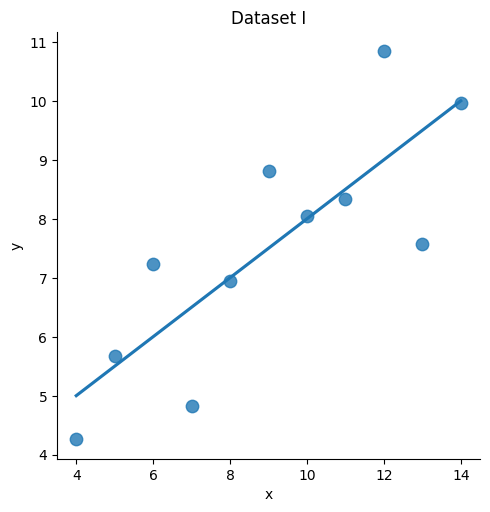

In [31]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80}); # Plot data and regression model

plt.title("Dataset I") # Add title to the scatterplot

plt.show() # Show the graph

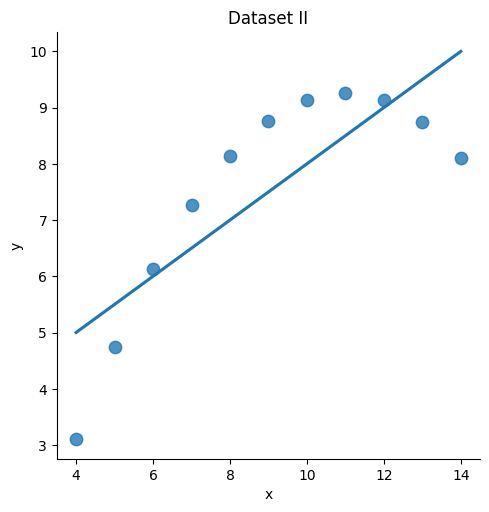

In [32]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80}); # Plot data and regression model

plt.title("Dataset II")

plt.show() # Show the graph

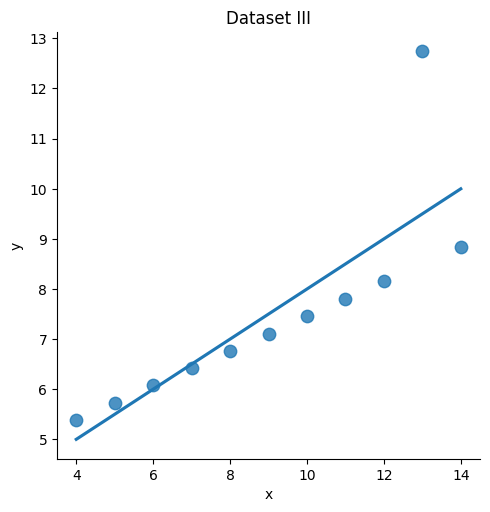

In [33]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80}); # Plot data and regression model

plt.title("Dataset III") # Add title to the scatterplot

plt.show() # Show the graph

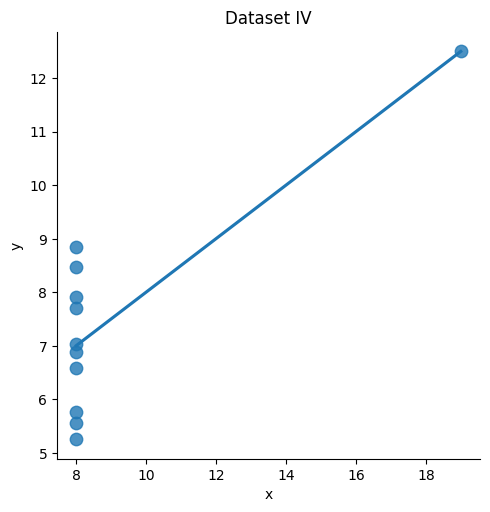

In [34]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'IV'"),
           ci=None, scatter_kws={"s": 80}); # Plot data and regression model

plt.title("Dataset IV") # Add title to the scatterplot

plt.show() # Show the graph

# Conclusion

After plotting same figures on scatterplot graphs, the result is not what I would have expected from just looking at summary statistics. 

**Dataset I** consists of a set of points that appear to follow a rough linear relationship with some variance.

**Dataset II** outputs a curve which doesn’t follow a linear relationship.

**Dataset III** looks like a tight linear relationship between x and y, except for one large outlier.

**Dataset IV** looks like x remains constant, except for one outlier as well.

Looking at these graphs I can see why it’s important to visualize the data to get a clear picture of what’s going on and it's a way of discovering different structures in data. It is clear that summary measures alone cannot adequately characterize a univariate or bivariate data distribution. Calculating summary stats should only be one piece of data analysis. 

To conclude, I think graphical methods are an important aspect when decision making to obtain true meaning of the data.